In [1]:
import numpy as np
import os
import cv2
import sys
import matplotlib.pyplot as plt
%matplotlib inline 

3


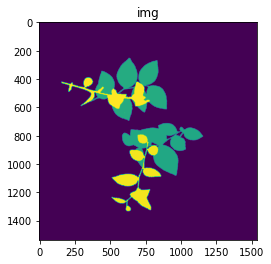

In [11]:
img = cv2.imread('Package_01_synthetic_1_1_im.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img/4
image = img.astype(np.uint8)
print(len(img.shape))

img= image[:,:,2] #visible masks
plt.imshow(img)
plt.title('img')
plt.show()
#img= image[:,:,0] #occluded masks
#plt.imshow(img)
#plt.title('img_occ')
#plt.show()

<class 'numpy.ndarray'>


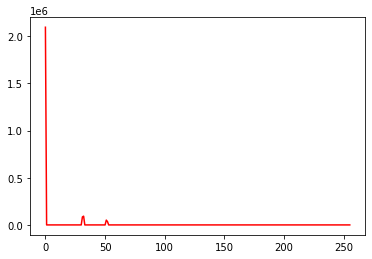

In [12]:
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])
print(type(histogram))
plt.plot(histogram, color='r')
plt.show()
# https://www.pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/

In [13]:
"""
Masks with labels begining with 3 such as 31 or 32, are for occluded instances.
On the contrary, labels starting with 5, such as 51 or 52 are for visible instances.
"""
labels = []
[labels.append(i) for i, l in enumerate(histogram) if i!= 0 and l != 0]
print(type(labels))
print(labels)

<class 'list'>
[31, 32, 51, 52]


In [14]:
instances_masks = {}

for instance_id in labels:
    mask = img == instance_id # assign 1 to pixels which have instances_id intensity value, 0 otherwise.
    #print(mask.dtype) : bool
    mask = mask.astype(np.uint8)
    #plt.imshow(mask)
    #plt.show()
    # Applies the mask to the original image, expect binary values: 0,255 only!
    instances_masks[instance_id] = cv2.bitwise_and(img, img, mask=mask * 255)
    #instances_masks[instance_id] = mask
print(instances_masks.keys())

dict_keys([31, 32, 51, 52])


In [ ]:
#Iterate over the keys to get masks and bboxes:
for key in instances_masks:
    #Get masks
    plt.imshow(instances_masks[key])
    plt.title('instance')
    plt.show()
    #Get bboxes
    x, y, z, w = cv2.boundingRect(instances_masks[key])
    print(x, y ,z, w)

In [ ]:
def get_unique_labels(instance_mask, exclude_zero=False):
    instance_mask = instance_mask.astype(np.uint8)
    # instance_mask numpy.ndarray.
    # uint8: 8-bit assigned integer [0-255]

    hist = cv2.calcHist([instance_mask], [0], None, [256], [0, 256])
    instances_ids = (np.nonzero(hist))[0]
    if exclude_zero:
        instances_ids = instances_ids[instances_ids > 0]
    return instances_ids.tolist()

In [ ]:
def get_instances(cutting_mask): # give it only one channel.
    instances_ids = get_unique_labels(cutting_mask, exclude_zero=True)
    instances_mask = {}
    instances_img = {}
    for instances_id in instances_ids:
        mask = cutting_mask == instances_id
        mask = mask.astype(np.uint8) # divide by 4, convert to int, you got the class.
        instances_mask[instances_id] = cv2.bitwise_and(cutting_mask, cutting_mask, mask=mask * 255)

    return instances_mask # instance_mask numpy.ndarray